In [23]:
import geopandas as gpd
import pandas as pd

In [24]:
df = pd.read_csv('data/csv/pasig_saved_coordinates.csv')

In [25]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
street_points

,geometry
0,POINT (121.06392 14.61466)
1,POINT (121.06445 14.60089)
2,POINT (121.06548 14.56409)
3,POINT (121.08611 14.60407)
4,POINT (121.08719 14.59297)
...,...
230,POINT (121.08433 14.57484)
231,POINT (121.08377 14.56039)
232,POINT (121.08376 14.54551)
233,POINT (121.08408 14.54179)


<AxesSubplot: >

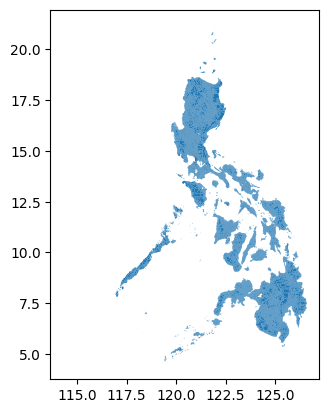

In [26]:
philippines = gpd.read_file('maps/phl_admbnda_adm4_psa_namria_20231106.zip')
philippines.plot()

In [69]:
philippines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

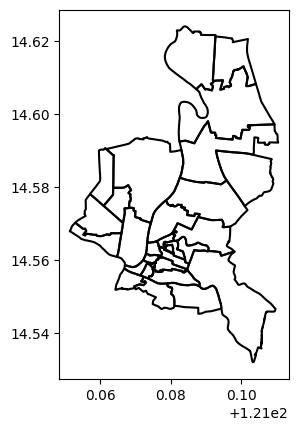

In [27]:
# pasig = philippines[philippines['ADM3_EN'] == 'City of Pasig']
pasig = philippines[philippines['ADM3_EN'] == 'City of Pasig']
pasig.boundary.plot(edgecolor='black')

In [70]:
pasig.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
pasig.shape

(30, 18)

In [110]:
pasig.head()

,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM,geometry
34727,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769,"POLYGON ((121.06826 14.57439, 121.06830 14.574..."
34728,Bagong Katipunan,PH1307403002,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.008178,0.000002,0.022305,"POLYGON ((121.07557 14.55938, 121.07565 14.559..."
34729,Bambang,PH1307403003,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.037444,0.000044,0.521039,"POLYGON ((121.08183 14.55734, 121.08205 14.557..."
34730,Buting,PH1307403004,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.025904,0.000029,0.348487,"POLYGON ((121.06733 14.55742, 121.06791 14.557..."
34731,Caniogan,PH1307403005,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.048018,0.000088,1.043965,"POLYGON ((121.07887 14.57603, 121.07900 14.575..."


<AxesSubplot: >

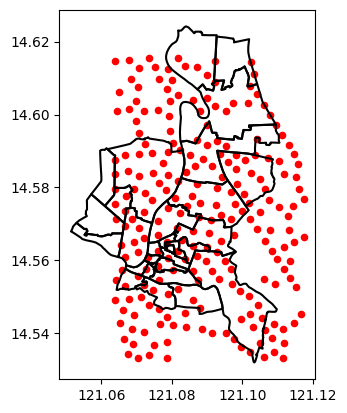

In [28]:
base = pasig.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=20, color='red')

In [48]:
clipped = gpd.clip(street_points, pasig)
clipped

,geometry
17,POINT (121.06659 14.55302)
169,POINT (121.07197 14.55324)
162,POINT (121.07043 14.55582)
7,POINT (121.06658 14.56100)
161,POINT (121.07034 14.56227)
...,...
23,POINT (121.08986 14.61083)
15,POINT (121.08724 14.61291)
228,POINT (121.08361 14.61329)
38,POINT (121.09223 14.61454)


<AxesSubplot: >

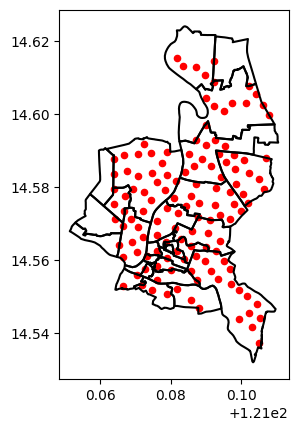

In [45]:
base = pasig.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=20, color='red')

In [109]:
len(clipped)

131

In [46]:
clipped.geometry.y

17     14.553015
169    14.553243
162    14.555817
7      14.560995
161    14.562274
         ...    
23     14.610833
15     14.612915
228    14.613291
38     14.614541
218    14.615457
Length: 131, dtype: float64

In [32]:
df = pd.DataFrame({'X': clipped.geometry.x, 'Y': clipped.geometry.y})
df.to_csv('data/csv/pasig_filtered_coordinates.csv', index=False)

In [151]:
joined = gpd.sjoin(
    clipped, 
    pasig,
    how='left'
)

In [166]:
joined.head()

,street_points,index_right,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,AREA_SQKM
17,POINT (121.06659 14.55302),34730,Buting,PH1307403004,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.025904,0.000029,0.348487
169,POINT (121.07197 14.55324),34730,Buting,PH1307403004,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.025904,0.000029,0.348487
162,POINT (121.07043 14.55582),34730,Buting,PH1307403004,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.025904,0.000029,0.348487
7,POINT (121.06658 14.56100),34727,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769
161,POINT (121.07034 14.56227),34727,Bagong Ilog,PH1307403001,NaN,City of Pasig,PH1307403,Metropolitan Manila Second District,PH13074,National Capital Region (NCR),PH13,Philippines (the),PH,2022-11-09,2023-11-06,NaN,0.044006,0.000102,1.212769


In [167]:
joined.dtypes

street_points    geometry
index_right         int64
ADM4_EN            object
ADM4_PCODE         object
ADM4_REF           object
ADM3_EN            object
ADM3_PCODE         object
ADM2_EN            object
ADM2_PCODE         object
ADM1_EN            object
ADM1_PCODE         object
ADM0_EN            object
ADM0_PCODE         object
date               object
validOn            object
validTo           float64
Shape_Leng        float64
Shape_Area        float64
AREA_SQKM         float64
dtype: object

In [169]:
# drop index column
joined = joined.drop(columns=['index_right'])

# rename columns
joined.rename(
    columns={'geometry': 'street_points'},
    inplace=True,
)

In [170]:
res = joined.groupby('ADM4_EN')['street_points']
res

In [172]:
res = joined.groupby('ADM4_EN')['street_points'].count().sort_values(ascending=False)
res

ADM4_EN
Ugong                 19
Pinagbuhatan          17
Santa Lucia           12
Maybunga              12
Manggahan             10
Rosario               10
Bagong Ilog            8
Caniogan               6
San Miguel             5
Santolan               5
Oranbo                 4
Palatiw                3
Kalawaan               3
Santo Tomas            3
Buting                 3
San Joaquin            2
Malinao                2
San Jose               1
San Nicolas (Pob.)     1
Dela Paz               1
Bambang                1
Kapasigan              1
Sumilang               1
Kapitolyo              1
Name: street_points, dtype: int64

In [173]:
len(res)

24

In [177]:
# gdf_res = pasig.merge(res, left_on='', )

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False